<a href="https://colab.research.google.com/github/JuanMartinez04/Digital_signal_processing_JDMS/blob/main/Fourier_matricial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fourier matricial, matriz cuadrada y rectangular

Hecho por Juan David Martínez

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import dft





# Transformada de Fourier Matricial

La Transformada de Fourier Discreta (DFT) puede representarse en forma matricial.
Si tenemos un vector de entrada $ x $ con $ N $ elementos, la DFT se puede calcular como:

$$
X = F \cdot x
$$

donde $ F $ es la matriz de Fourier de tamaño $ N \times N $ cuyos términos están definidos por:

$$
F[k, n] = e^{-2\pi i k n / N}
$$

Cuando $ F $ es cuadrada ($ N = M $), la transformación es perfectamente invertible usando la IDFT.
Si la matriz no es cuadrada ($ M \neq N $), la transformación no es biunívoca y puede implicar pérdida de información.

## Construcción de la matriz de Fourier

La matriz de Fourier $ F $ es una matriz compleja cuyos elementos están definidos por:

$$
F[k, n] = e^{-2\pi i k n / N}
$$

Esto significa que cada elemento de la matriz es una raíz de la unidad elevada a una potencia específica. Veamos cómo se construye esta matriz para un caso simple con $ N = 4 $:

$$
F = \begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & e^{-2\pi i /4} & e^{-4\pi i /4} & e^{-6\pi i /4} \\
1 & e^{-4\pi i /4} & e^{-8\pi i /4} & e^{-12\pi i /4} \\
1 & e^{-6\pi i /4} & e^{-12\pi i /4} & e^{-18\pi i /4} \\
\end{bmatrix}
$$

Cada término es una potencia de la raíz de la unidad $ e^{-2\pi i / N} $.

In [7]:
def matriz_fourier(N, M=None):
    """Genera la matriz de Fourier de dimensiones MxN."""
    if M is None:
        M = N
    F = np.zeros((M, N), dtype=complex)
    for k in range(M):
        for n in range(N):
            F[k, n] = np.exp(-2j * np.pi * k * n / N)
    return F

## Caso 1: Matriz cuadrada

Cuando $ F $ es cuadrada, la transformación mantiene toda la información y es reversible.
Ejemplo para $ N = 4 $:

$$
F = \frac{1}{2}\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i \\
\end{bmatrix}
$$

In [8]:
def prueba_cuadrada():
    N = 4
    F = matriz_fourier(N)
    print("Matriz de Fourier (cuadrada, N=N):")
    print(F)

    x = np.array([1, 2, 3, 4])
    X = F @ x
    print("Transformada de Fourier de x:", X)

prueba_cuadrada()

Matriz de Fourier (cuadrada, N=N):
[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
  -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00-1.2246468e-16j
   1.0000000e+00+2.4492936e-16j -1.0000000e+00-3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
  -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]]
Transformada de Fourier de x: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


## Caso 2: Matriz no cuadrada

Si $ M \neq N $, la transformación deja de ser biunívoca. Dependiendo de si $ M > N $ o $ M < N $,
se puede perder información o generar una sobrerrepresentación de los datos.
Ejemplo para $ M = 6, N = 4 $:

$$
F = \begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & e^{-2\pi i /4} & e^{-4\pi i /4} & e^{-6\pi i /4} \\
1 & e^{-4\pi i /4} & e^{-8\pi i /4} & e^{-12\pi i /4} \\
1 & e^{-6\pi i /4} & e^{-12\pi i /4} & e^{-18\pi i /4} \\
1 & e^{-8\pi i /4} & e^{-16\pi i /4} & e^{-24\pi i /4} \\
1 & e^{-10\pi i /4} & e^{-20\pi i /4} & e^{-30\pi i /4} \\
\end{bmatrix}
$$

Esto genera una sobre-representación de las frecuencias, lo que puede afectar la interpretación de los datos transformados.


In [9]:
def prueba_no_cuadrada():
    N = 4  # Número de muestras de entrada
    M = 6  # Número de coeficientes en la salida (sobredimensionada)
    F = matriz_fourier(N, M)
    print("Matriz de Fourier (no cuadrada, M>N):")
    print(F)

    x = np.array([1, 2, 3, 4])
    X = F @ x
    print("Transformada de Fourier de x con matriz no cuadrada:", X)
prueba_no_cuadrada()

Matriz de Fourier (no cuadrada, M>N):
[[ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  6.12323400e-17-1.00000000e+00j
  -1.00000000e+00-1.22464680e-16j -1.83697020e-16+1.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j -1.00000000e+00-1.22464680e-16j
   1.00000000e+00+2.44929360e-16j -1.00000000e+00-3.67394040e-16j]
 [ 1.00000000e+00+0.00000000e+00j -1.83697020e-16+1.00000000e+00j
  -1.00000000e+00-3.67394040e-16j  5.51091060e-16-1.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+2.44929360e-16j
   1.00000000e+00+4.89858720e-16j  1.00000000e+00+7.34788079e-16j]
 [ 1.00000000e+00+0.00000000e+00j  3.06161700e-16-1.00000000e+00j
  -1.00000000e+00-6.12323400e-16j -2.69484194e-15+1.00000000e+00j]]
Transformada de Fourier de x con matriz no cuadrada: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j 10.+4.89858720e-15j -2.+2.00

Matriz de Fourier W_N:
[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


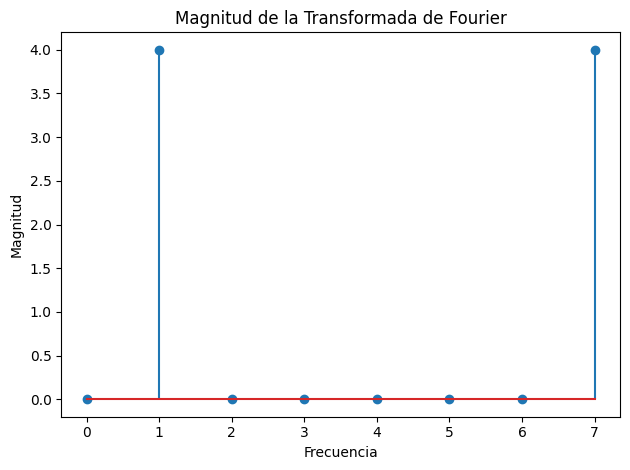

In [12]:
import matplotlib.pyplot as plt

# Definir la función para calcular la DFT mediante la matriz de Fourier
def dft_matrix(N):
    k = np.arange(N)
    n = k.reshape((N, 1))  # Convertir en columna para el producto matricial
    W = np.exp(-2j * np.pi * k * n / N)
    return W

# Señal de ejemplo
N = 8  # Tamaño de la señal
t = np.arange(N)
x = np.sin(2 * np.pi * t / N)  # Señal senoidal de ejemplo

# Calcular la DFT usando la matriz de Fourier
W = dft_matrix(N)
X = W @ x  # Multiplicación matricial

# Mostrar la matriz de Fourier
print("Matriz de Fourier W_N:")
print(np.round(W, 3))  # Redondear para mejor visualización

# Graficar la transformada de Fourier

plt.stem(np.abs(X))
plt.title("Magnitud de la Transformada de Fourier")
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")


plt.tight_layout()
plt.show()


(8, 6)
Matriz de Fourier rectangular W_MxN:
[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j]]


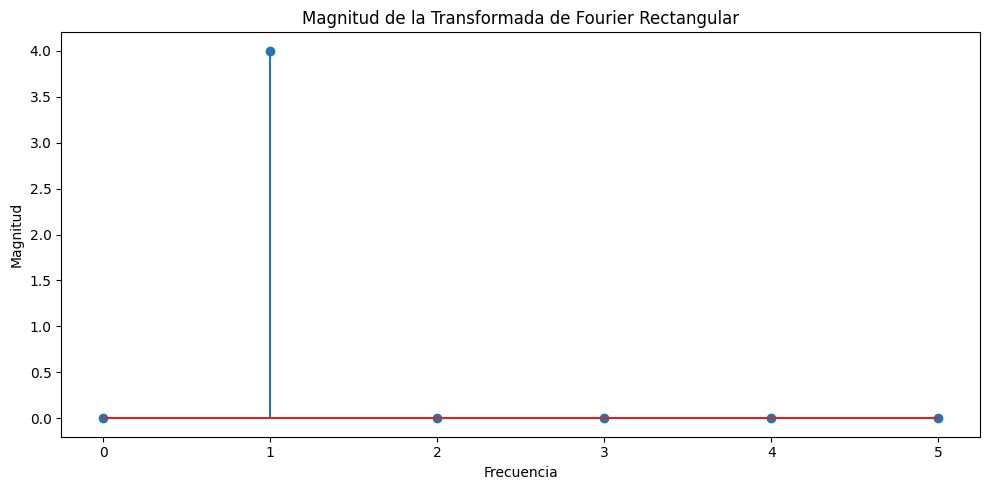

In [19]:
# Definir la función para calcular la DFT mediante la matriz de Fourier rectangular
def dft_matrix_rectangular(M, N):
    k = np.arange(M)
    n = np.arange(N).reshape((N, 1))  # Convertir en columna para el producto matricial
    W = np.exp(-2j * np.pi * k * n / N)
    return W

# Parámetros de la señal
N = 8  # Número de muestras de la señal
t = np.arange(N)
x = np.sin(2 * np.pi * t / N)  # Señal senoidal de ejemplo

# Definir la matriz rectangular (M > N o M < N)
M = 6  # Número de filas de la matriz (puede ser diferente de N)
W_rect = dft_matrix_rectangular(M, N)
print(W_rect.shape)

X_rect = x@W_rect   # Multiplicación matricial

# Mostrar la matriz de Fourier rectangular
print("Matriz de Fourier rectangular W_MxN:")
print(np.round(W_rect, 3))  # Redondear para mejor visualización

# Graficar la transformada de Fourier rectangular
plt.figure(figsize=(10, 5))

plt.stem(np.abs(X_rect))
plt.title("Magnitud de la Transformada de Fourier Rectangular")
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")



plt.tight_layout()
plt.show()